In [40]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

**This notebook** plots wind stress from EXH005 and EXH001. Seems that **wind stress** from thest two runs are **not the same**.

Tests are done on a 5-day average model output and some yearly-average model outputs.

In [1]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import matplotlib.patches as patches
% matplotlib inline

In [38]:
from ArcticTools import map
import importlib as imp

In [3]:
from ArcticTools import hovmoller as hov
import seaborn as sn
sn.set()

In [6]:
tmask=nc.Dataset(
        '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/crop.nc')
#mbathy=tmask.variables['mbathy'][0,400:,:]
e1t=tmask.variables['e1t'][0,400:,:]
e2t=tmask.variables['e2t'][0,400:,:]
e3t=tmask.variables['e3t'][0,:,400:,:]
tmask=tmask.variables['tmask'][0,:,400:,:]


bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]

# list of variables in gridU

In [29]:
a=nc.Dataset(glob.glob('*EXH001*U*2010*')[0])
a

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: GDT 1.3
    file_name: ANHA4-EXH001_y2010m12d27_gridU.nc
    production: OPA9.0 beta
    TimeStamp: 2015-APR-22 13:06:35 GMT-0600
    dimensions(sizes): x(544), y(800), depthu(50), time_counter(1)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float32 depthu(depth), float32 time_counter(time_counter), float32 vozocrtx(time_counter,depth,y,x), float32 sozotaux(time_counter,y,x)
    groups: 

```
float vozocrtx(time_counter, depth, y, x) ;
                vozocrtx:units = "m/s" ;
                vozocrtx:short_name = "vozocrtx" ;
                vozocrtx:long_name = "Zonal Current" ;


float sozotaux(time_counter, y, x) ;
                sozotaux:units = "N/m2" ;
                sozotaux:short_name = "sozotaux" ;
                sozotaux:long_name = "Wind Stress along i-axis" ;```

In [14]:
def load_w(vel_comp,T, tmask, ENG, key ):
    '''
    This function is designed to obtain velocity field
    ======================================================
    '''
    #vels ={'U':'vozocrtx','V':'vomecrty','W':'vovecrtz'}
    vels ={'U':'sozotaux','V':'sometauy','W':'vovecrtz'}
    print (glob.glob('*%s*%s*%s*.nc'%(ENG,vel_comp,T))[0])
    with nc.Dataset(glob.glob('*%s*%s*%s*.nc'%(ENG,vel_comp,T))[0])\
as temp:
        #print (temp.variables)
        data  = temp.variables[vels[vel_comp]][0,400:,:]
    #data  = np.ma.masked_where(tmask == 0,data)
    return data

In [15]:
# grid for plotting
x1d=np.linspace(0,e3t[0,:,:].shape[0],e3t[0,:,:].shape[0])
y1d=np.linspace(0,e3t[0,:,:].shape[1],e3t[0,:,:].shape[1])
x2d,y2d=np.meshgrid(y1d,x1d)

# plot 5-day average output

#### LHS: wind stress plot from two runs.  Red arrows: wind stress from EXH001. Black arrows: wind stress from EXH005

#### RHS: wind stress difference between two runs - EXH001 substracts EXH005

ANHA4-EXH001_gridU_y2010m12d22.nc
ANHA4-EXH001_gridV_y2010m12d22.nc
ANHA4-EXH005_gridU_y2010m12d22.nc
ANHA4-EXH005_gridV_y2010m12d22.nc


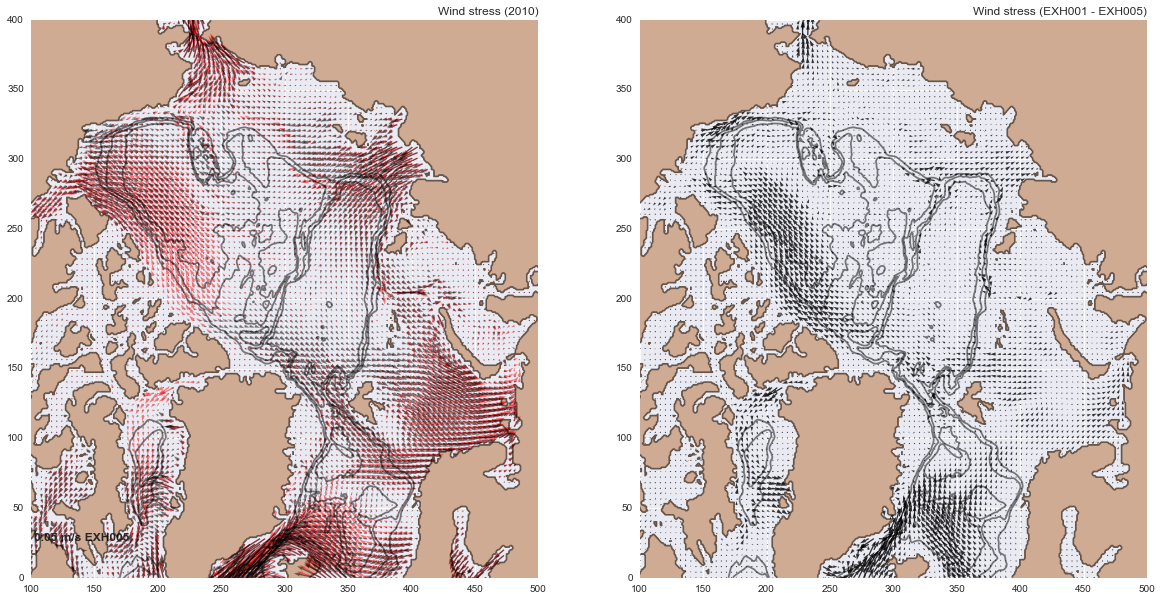

In [36]:
for year in [2010]:
    fig = plt.figure(figsize = (20,10))
    
    plt.subplot(121)

    u= load_w('U',T=year,tmask= tmask, ENG='EXH001', key = 'U')
    v= load_w('V',T=year,tmask= tmask, ENG='EXH001', key = 'V')

    
    u2= load_w('U',T=year,tmask= tmask, ENG='EXH005', key = 'U')
    v2= load_w('V',T=year,tmask= tmask, ENG='EXH005', key = 'U')
    
    
    plt.contour(x2d,y2d,bathy[:,:],[0,1000,2000,3000],linewidth=0.075,colors='black',alpha=0.5)
    plt.contourf(x2d,y2d,bathy[:,:],[0,1],cmap = 'pink_r');plt.xlim([100,500])
    Q=plt.quiver(x2d[::4,::4], y2d[::4,::4], u[::4,::4], v[::4,::4],
                   scale=5,width=0.0025,color='r',alpha=0.5)
    Q=plt.quiver(x2d[::4,::4], y2d[::4,::4], u2[::4,::4], v2[::4,::4],
                   scale=5,width=0.0025,color='k',alpha=0.5)
    Qlabel=plt.quiverkey(Q,0.1, 0.05, 0.05, '0.05 m/s EXH005',fontproperties={'weight': 'bold'})
    plt.title('Wind stress (%s)'%year,loc= 'right')
    
    
    
    plt.subplot(122)
    plt.quiver(x2d[::4,::4], y2d[::4,::4], u[::4,::4]-u2[::4,::4], v[::4,::4]-v2[::4,::4],
                   scale=5,width=0.0025,color='k',alpha=0.8)
    plt.contour(x2d,y2d,bathy[:,:],[0,1000,2000,3000],linewidth=0.075,colors='black',alpha=0.5)
    plt.contourf(x2d,y2d,bathy[:,:],[0,1],cmap = 'pink_r');plt.xlim([100,500])
    plt.title('Wind stress (EXH001 - EXH005)',loc= 'right')
    
    plt.show()


In [19]:
def load_w_yearly(vel_comp,T, tmask, ENG, key ):
    '''
    This function is designed to obtain velocity field
    ======================================================
    '''
    #vels ={'U':'vozocrtx','V':'vomecrty','W':'vovecrtz'}
    vels ={'U':'sozotaux','V':'sometauy','W':'vovecrtz'}
    with nc.Dataset(glob.glob('/ocean/xiaoxiny/research/result_jasper/data_eng3/*%s*%s*%s.nc'%(ENG,vel_comp,T))[0])\
as temp:
        #print (temp.variables)
        data  = temp.variables[vels[vel_comp]][0,400:,:]
    #data  = np.ma.masked_where(tmask == 0,data)
    return data

# plot yearly-average output

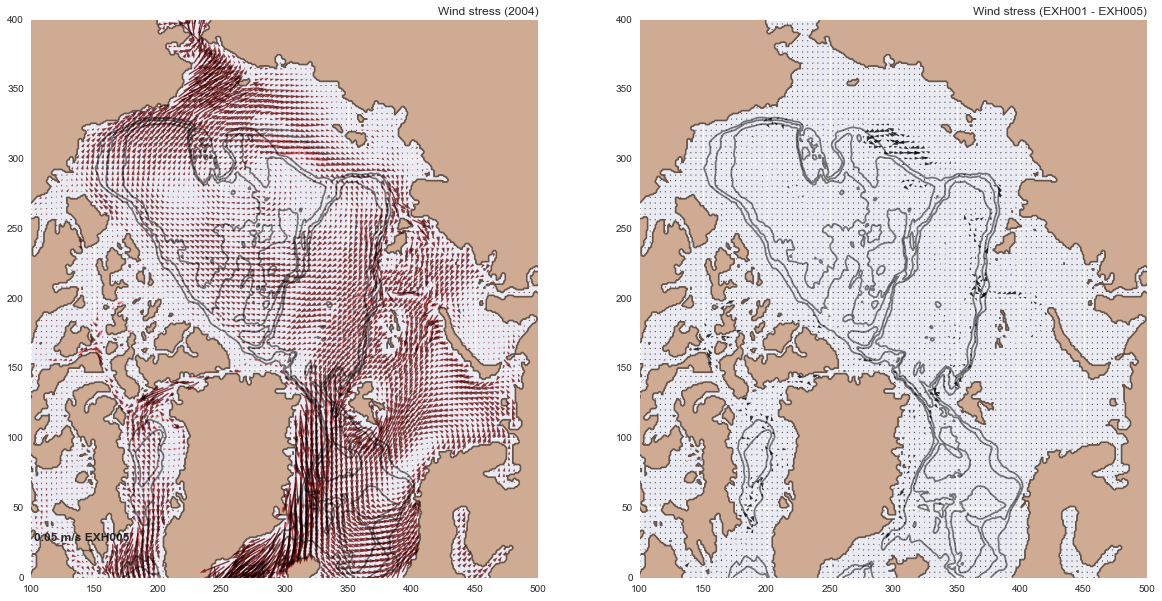

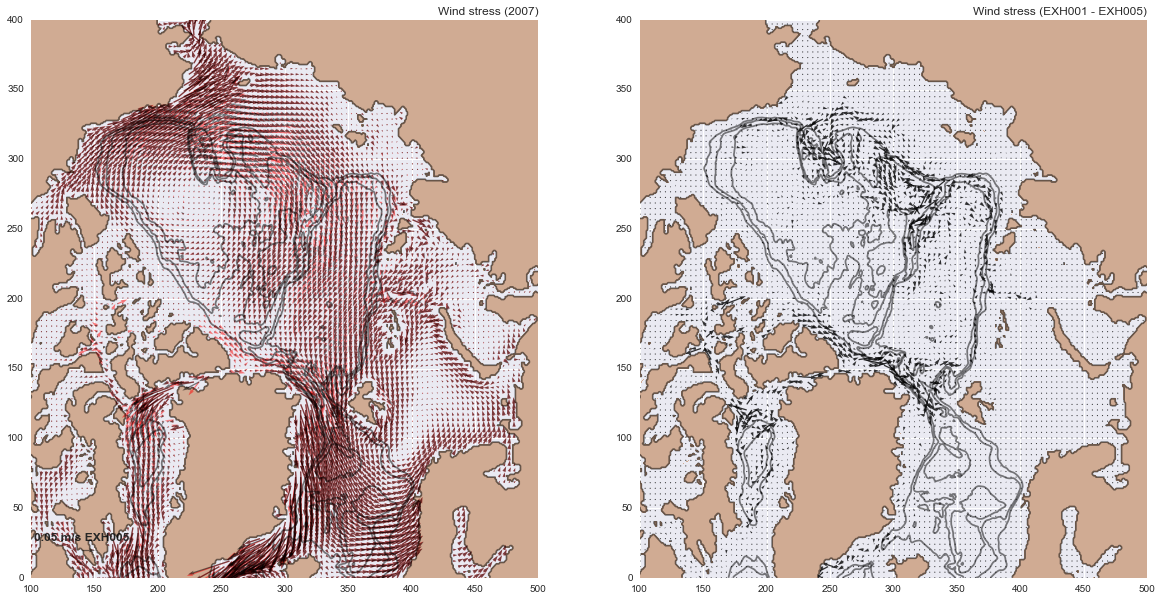

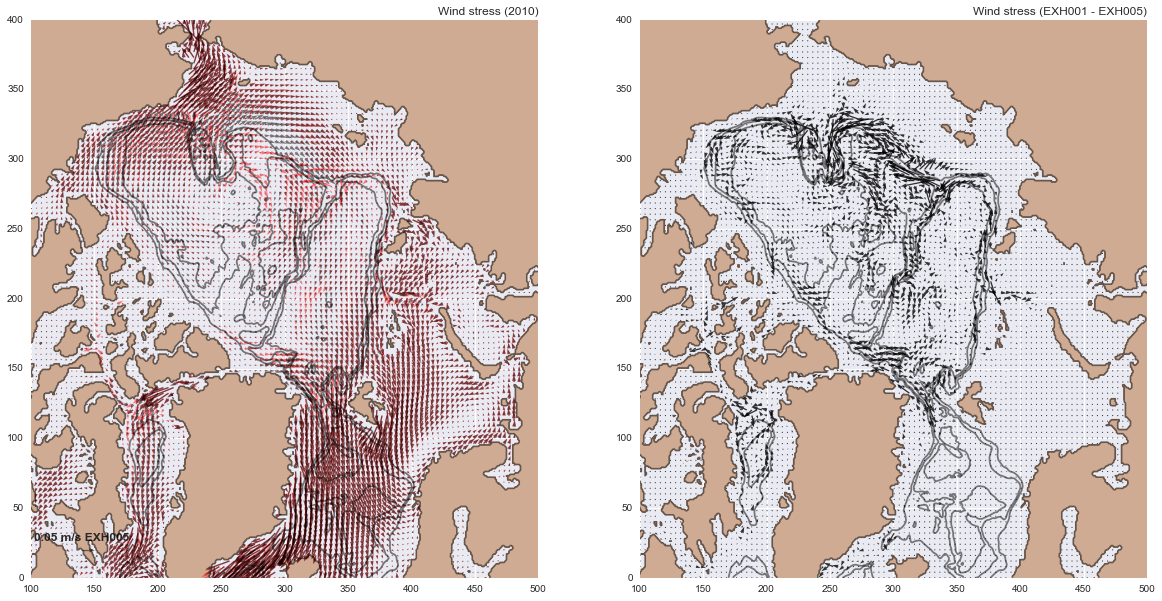

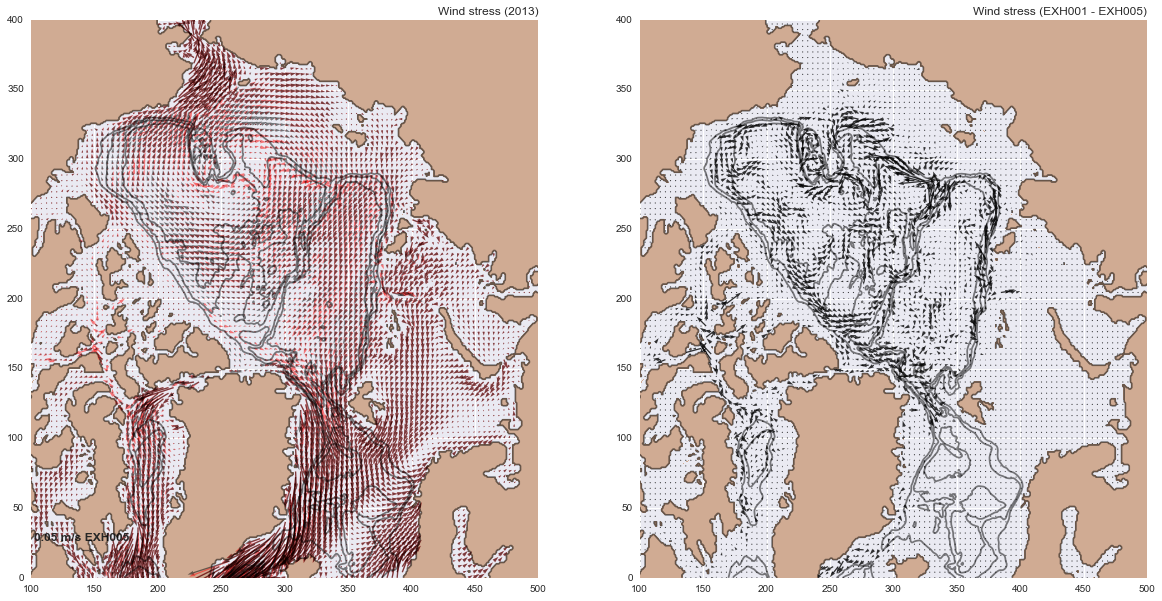

In [34]:
for year in [2004,2007,2010,2013]:
    fig = plt.figure(figsize = (20,10))
    
    plt.subplot(121)

    u= load_w_yearly('U',T=year,tmask= tmask, ENG='EXH001', key = 'U')
    v= load_w_yearly('V',T=year,tmask= tmask, ENG='EXH001', key = 'V')

    
    u2= load_w_yearly('U',T=year,tmask= tmask, ENG='EXH005', key = 'U')
    v2= load_w_yearly('V',T=year,tmask= tmask, ENG='EXH005', key = 'U')
    
    
    plt.contour(x2d,y2d,bathy[:,:],[0,1000,2000,3000],linewidth=0.075,colors='black',alpha=0.5)
    plt.contourf(x2d,y2d,bathy[:,:],[0,1],cmap = 'pink_r');plt.xlim([100,500])
    Q=plt.quiver(x2d[::4,::4], y2d[::4,::4], u[::4,::4], v[::4,::4],
                   scale=2,width=0.0025,color='r',alpha=0.5)
    Q=plt.quiver(x2d[::4,::4], y2d[::4,::4], u2[::4,::4], v2[::4,::4],
                   scale=2,width=0.0025,color='k',alpha=0.5)
    Qlabel=plt.quiverkey(Q,0.1, 0.05, 0.05, '0.05 m/s EXH005',fontproperties={'weight': 'bold'})
    plt.title('Wind stress (%s)'%year,loc= 'right')
    
    
    
    plt.subplot(122)
    #fig = plt.figure(figsize = (10,10))
    plt.quiver(x2d[::4,::4], y2d[::4,::4], u[::4,::4]-u2[::4,::4], v[::4,::4]-v2[::4,::4],
                   scale=1.,width=0.0025,color='k',alpha=0.8)
    plt.contour(x2d,y2d,bathy[:,:],[0,1000,2000,3000],linewidth=0.075,colors='black',alpha=0.5)
    plt.contourf(x2d,y2d,bathy[:,:],[0,1],cmap = 'pink_r');plt.xlim([100,500])
    plt.title('Wind stress (EXH001 - EXH005)',loc= 'right')
    
    plt.show()
